# Black-Scholes model

[*********************100%***********************]  1 of 1 completed


44.77372179093064
0.4847766487313212


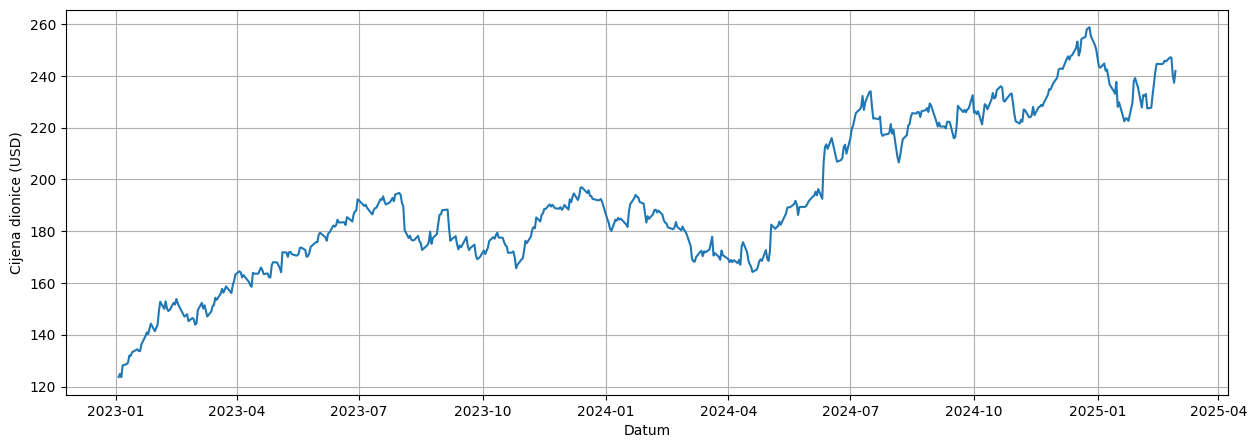

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from datetime import datetime

N = norm.cdf

def parametri(symbol, K, maturity_date, r=0.05):
    ticker = yf.Ticker(symbol)

    S = ticker.history(period="1d")['Close'].iloc[-1]

    # Vrijeme do dospijeća (T) u godinama
    today = datetime.today()
    maturity = datetime.strptime(maturity_date, "%Y-%m-%d")
    T = (maturity - today).days / 365.25

    #  Volatilnost (sigma)
    hist_returns = np.log(ticker.history(period="1y")['Close'] / ticker.history(period="1y")['Close'].shift(1))
    sigma = hist_returns.std() * np.sqrt(252)

    # Dividend yield (q)
    dividend_yield = ticker.info.get('dividendYield', 0.0)

    return S, K, T, r, sigma, dividend_yield # K i r se zadaju ručno

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

data = yf.download('AAPL', start='2023-01-01', end='2025-06-01')
S, K, T, r, sigma, q = parametri("AAPL", 200, "2025-06-01")

plt.figure(figsize=(15, 5))
plt.plot(data['Close'])
plt.xlabel('Datum')
plt.ylabel('Cijena dionice (USD)')
plt.grid(True)

call = BS_CALL(S, K, T, r, sigma)
put = BS_PUT(S, K, T, r, sigma)

print(call)
print(put)